In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from scipy.stats import kstest

z_thresh = 4

In [2]:
def get_active_cells(traces):

    # going to return a dictionary with only active cells, formatted exactly the same as traces

    d = dict.fromkeys(traces.keys())

    for cell in traces:
        if traces[cell]['active'] == True:
            d[cell] = traces[cell]
        else:
            d.pop(cell,None)

    return d

In [3]:
def get_best_frequency_65db(cell_tuning,freqs):
    responses = cell_tuning[:,2]
    if np.all(responses == 0):
        return 55
    else:
        max_response_idx = np.argmax(responses)
    return max_response_idx

In [43]:
# Load all required files for the psilocybin recording day

# saline_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/12052022_GCaMP6s_ID184_psilo/TSeries-01012009-0054-028/suite2p/plane0/cells.pkl"
# psilo_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/12052022_GCaMP6s_ID184_psilo/TSeries-01012009-0054-029/suite2p/plane0/cells.pkl"
saline_186 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID186/12012022_GCaMP6s_ID186_psilo/TSeries-12012022-1321-026/suite2p/plane0/cells.pkl"
psilo_186 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID186/12012022_GCaMP6s_ID186_psilo/TSeries-12012022-1321-027/suite2p/plane0/cells.pkl"

saline_237 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID237/12122022_GCaMP6s_ID237_psilo/TSeries-12122022-1307-033/suite2p/plane0/cells.pkl"
psilo_237 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID237/12122022_GCaMP6s_ID237_psilo/TSeries-12122022-1307-034/suite2p/plane0/cells.pkl"

saline_239 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID239/01172023_Psilo/TSeries-01172023-1212-042/suite2p/plane0/cells.pkl"
psilo_239 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID239/01172023_Psilo/TSeries-01172023-1212-043/suite2p/plane0/cells.pkl"

saline_251 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID251/ID251_17012023_psilo/TSeries-01172023-1212-044/suite2p/plane0/cells.pkl"
psilo_251 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID251/ID251_17012023_psilo/TSeries-01172023-1212-045/suite2p/plane0/cells.pkl"

saline_269 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID269/ID269_08032023_psilocybin/TSeries-03082023-1211-065/suite2p/plane0/cells.pkl"
psilo_269 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID269/ID269_08032023_psilocybin/TSeries-03082023-1211-066/suite2p/plane0/cells.pkl"

saline_276 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/ID276_07032023_Psilocybin/TSeries-03072023-1303-063/suite2p/plane0/cells.pkl"
psilo_276 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/ID276_07032023_Psilocybin/TSeries-03072023-1303-064/suite2p/plane0/cells.pkl"

saline_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/psilo/TSeries-10132023-1324-139/suite2p/plane0/cells.pkl"
psilo_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/psilo/TSeries-10132023-1324-140/suite2p/plane0/cells.pkl"

saline_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/psilo/TSeries-10132023-1324-142/suite2p/plane0/cells.pkl"
psilo_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/psilo/TSeries-10132023-1324-143/suite2p/plane0/cells.pkl"

all_dicts_saline = [saline_186,saline_237,saline_239,saline_251,saline_269,saline_276,saline_473,saline_474]
all_dicts_psilo = [psilo_186,psilo_237,psilo_239,psilo_251,psilo_269,psilo_276,psilo_473,psilo_474]
all_dicts_saline_str = ["saline_186","saline_237","saline_239","saline_251","saline_269","saline_276","saline_473","saline_474"]
all_dicts_psilo_str = ["psilo_186","psilo_237","psilo_239","psilo_251","psilo_269","psilo_276","psilo_473","psilo_474"]
saline_dict ={}
psilo_dict = {}

for file in all_dicts_saline_str:
    saline_dict[file]=None

for file in all_dicts_psilo_str:
    psilo_dict[file] = None

# for file in all_dicts_saline:
#     with open(file,'rb') as f:
#         saline_dict[file] = pickle.load(f)

zippedsaline = zip(all_dicts_saline, all_dicts_saline_str)
for k,v in zippedsaline:
    with open(k,'rb') as f:
        saline_dict[v] = pickle.load(f)


zippedpsilo = zip(all_dicts_psilo, all_dicts_psilo_str)
for k,v in zippedpsilo:
    with open(k,'rb') as f:
        psilo_dict[v] = pickle.load(f)


    





In [5]:
print(saline_dict['saline_237'][1]['matched_cells'])

[[   1   22]
 [   4    7]
 [   7  201]
 [   8  162]
 [  10  156]
 [  13  271]
 [  14  157]
 [  16   56]
 [  19  165]
 [  20  446]
 [  23  182]
 [  27  204]
 [  30  389]
 [  31  350]
 [  34  147]
 [  36   45]
 [  37  104]
 [  38  280]
 [  41  233]
 [  43    4]
 [  44   17]
 [  47   51]
 [  48   29]
 [  49  284]
 [  50  569]
 [  51   28]
 [  55   49]
 [  56   55]
 [  58  568]
 [  59   27]
 [  61   67]
 [  62   24]
 [  63  313]
 [  64  169]
 [  65  474]
 [  67  261]
 [  68  530]
 [  70  177]
 [  71  134]
 [  72  106]
 [  73   62]
 [  76   38]
 [  78  314]
 [  79  260]
 [  80  146]
 [  81  136]
 [  82  594]
 [  85   74]
 [  87  328]
 [  91  126]
 [  93  455]
 [  94  120]
 [  95  600]
 [  97   76]
 [ 100  121]
 [ 103  206]
 [ 104  255]
 [ 110  246]
 [ 112  212]
 [ 113   23]
 [ 114  419]
 [ 117   90]
 [ 119   50]
 [ 131   88]
 [ 135   85]
 [ 136   12]
 [ 137  124]
 [ 138  101]
 [ 139  193]
 [ 143  113]
 [ 146  100]
 [ 149  172]
 [ 155  293]
 [ 156  102]
 [ 159  119]
 [ 162  472]
 [ 167  355]

In [6]:
cell_list_1 = list(saline_dict[all_dicts_saline_str[0]].keys())
dict_keys = list(saline_dict.keys())

nfreq = list(saline_dict[all_dicts_saline_str[0]][cell_list_1[0]]['traces'].keys())
nInt = list(saline_dict[all_dicts_saline_str[0]][cell_list_1[0]]['traces'][nfreq[0]].keys())
ntrial = list(saline_dict[all_dicts_saline_str[0]][cell_list_1[0]]['traces'][nfreq[0]][nInt[0]].keys())
print(nfreq, nInt, ntrial)
print(dict_keys)

[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['saline_186', 'saline_237', 'saline_239', 'saline_251', 'saline_269', 'saline_276', 'saline_473', 'saline_474']


In [54]:
sensitivity_saline = []
for dict in saline_dict:
    cell_list = list(saline_dict[dict].keys())
    for cell in cell_list:
        tuning_array = np.array(saline_dict[dict][cell]['peak_tuning'])
        for j in range(len(nInt)):
            if any(y > z_thresh for y in tuning_array[0:,j]):
                sensitivity_saline.append(float(j))
                break
            else:
                continue

In [55]:
sensitivity_psilo = []
for dict in psilo_dict:
    cell_list = list(psilo_dict[dict].keys())
    for cell in cell_list:
        tuning_array = np.array(psilo_dict[dict][cell]['peak_tuning'])
        for j in range(len(nInt)):
            if any(y > z_thresh for y in tuning_array[0:,j]):
                sensitivity_psilo.append(float(j))
                break
            else:
                continue

In [9]:
print(sensitivity_saline)
print(sensitivity_psilo)

[0.0, 3.0, 0.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 1.0, 3.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 3.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 1.0, 2.0, 3.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.0, 3.0, 0.0, 1.0, 2.0, 3.0, 0.0, 0.0, 1.0, 1.0, 3.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 1.0, 0.0, 3.0, 0.0, 2.0, 0.0, 0.0, 3.0, 2.0, 3.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 0.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 1.0, 2.0, 2.0, 3.0, 2.0, 0.0, 2.0, 1.0, 3.0, 0.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 1.0, 2.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 2.0, 3.0, 2.0, 1.0]
[0.0, 3.0, 2.0, 3.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 2.0, 0.0, 0.0, 2.0, 3.0, 3.0, 3.0

In [106]:
filepath = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/"
sensitivity_saline_2 = np.load(filepath + 'sensitivity_post_saline.npy')

In [107]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

array_saline = ecdf(sensitivity_saline_2)
print(array_saline[1])

array_psilo = ecdf(sensitivity_psilo)
print(array_psilo[1])

[0.32193909 0.56494717 0.82846489 1.        ]
[0.3712036  0.62148481 0.83802025 1.        ]


In [116]:
filepath = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/"
sensitivity_saline_2 = np.load(filepath + 'sensitivity_post_saline.npy')
sensitivity_saline_1 = np.load(filepath + 'sensitivity_pre_saline.npy')

In [117]:
def plot_cdf(data):
    # Define your series
    s = pd.Series(data, name = 'value')
    df = pd.DataFrame(s)
    # Get the frequency, PDF and CDF for each value in the series

    # Frequency
    stats_df = df \
    .groupby('value') \
    ['value'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'value': 'frequency'})

    # PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    # CDF
    stats_df['cdf'] = stats_df['pdf'].cumsum()
    stats_df = stats_df.reset_index()
    stats_df

    return stats_df

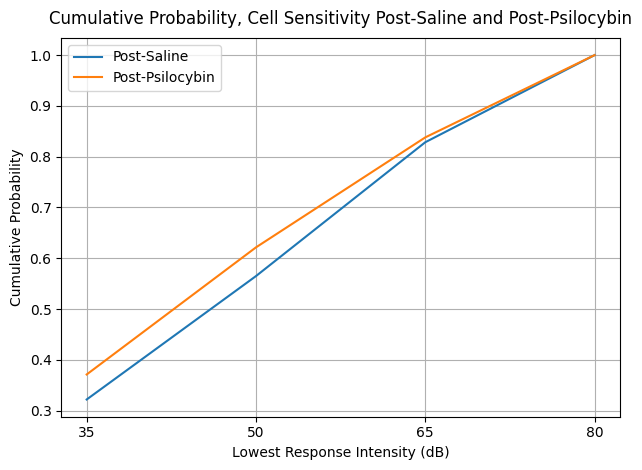

In [150]:
saline = plot_cdf(sensitivity_saline_2)
psilocybin = plot_cdf(sensitivity_psilo)

label = ["Post-Saline","Post-Psilocybin"]

zipped = zip([saline,psilocybin], label)

fig = plt.figure()

for frame,label in zipped:
    plt.plot(frame['value'], frame['cdf'],label = label )
plt.title("Cumulative Probability, Cell Sensitivity Post-Saline and Post-Psilocybin",pad=10)
plt.xticks(range(len(nInt)), nInt)
plt.xlabel("Lowest Response Intensity (dB)")
plt.ylabel("Cumulative Probability")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [119]:
# Perform KS test between two samples
ks_statistic, p_value = kstest(sensitivity_saline_1, sensitivity_saline)

# Print test results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

KS Statistic: 0.02020046764255509
P-value: 0.8200926043992695


In [13]:
BF_65_psilo_1 = []
mean_peak_amplitude_1 = []
for dict in saline_dict:
    dictionary = {}
    
    cell_list = list(saline_dict[dict].keys())
    for cell in cell_list:
        BF = get_best_frequency_65db(saline_dict[dict][cell]['tuning'],nfreq)
        BF_65_psilo_1.append(BF)

        if BF != 55:

            tuning_array = saline_dict[dict][cell]['tuning']
            amplitude = tuning_array[BF,2]
            if amplitude > z_thresh:
                mean_peak_amplitude_1.append(amplitude)



print(BF_65_psilo_1)
print(mean_peak_amplitude_1)

[4, 9, 4, 6, 6, 9, 10, 10, 1, 8, 5, 7, 5, 5, 0, 3, 0, 1, 10, 5, 2, 2, 3, 4, 10, 4, 8, 6, 2, 7, 5, 10, 4, 1, 0, 0, 2, 6, 5, 2, 7, 5, 2, 0, 3, 10, 6, 6, 11, 0, 1, 1, 3, 11, 9, 6, 10, 8, 7, 4, 6, 0, 10, 2, 6, 6, 2, 10, 9, 5, 7, 4, 11, 11, 0, 6, 8, 2, 9, 6, 7, 4, 7, 8, 0, 2, 0, 10, 3, 11, 9, 10, 10, 1, 1, 1, 5, 9, 2, 7, 2, 10, 10, 2, 11, 0, 10, 1, 6, 6, 2, 11, 9, 2, 4, 10, 6, 11, 6, 9, 7, 9, 7, 9, 1, 0, 4, 3, 3, 10, 9, 1, 11, 8, 5, 10, 2, 11, 0, 7, 2, 7, 6, 4, 4, 6, 8, 4, 11, 1, 0, 9, 9, 2, 5, 11, 10, 11, 1, 1, 5, 1, 6, 5, 11, 0, 2, 2, 0, 11, 1, 2, 3, 9, 1, 10, 6, 9, 2, 9, 7, 11, 1, 10, 1, 5, 3, 7, 0, 11, 11, 0, 3, 7, 2, 11, 5, 9, 2, 11, 4, 11, 2, 1, 7, 0, 1, 4, 9, 1, 6, 9, 11, 1, 10, 3, 3, 5, 11, 1, 11, 2, 3, 8, 9, 11, 0, 6, 7, 11, 0, 8, 4, 7, 1, 4, 3, 3, 10, 2, 2, 11, 1, 10, 6, 3, 9, 11, 8, 0, 0, 2, 8, 6, 0, 6, 1, 4, 9, 10, 8, 2, 2, 9, 8, 1, 7, 4, 7, 1, 0, 9, 10, 8, 8, 9, 7, 9, 11, 5, 10, 7, 0, 7, 9, 4, 11, 2, 7, 2, 11, 2, 9, 3, 9, 7, 3, 7, 9, 8, 10, 7, 9, 8, 6, 11, 2, 9, 5, 0, 2, 2, 2, 

6.984487539784368
7.04483872922949
0.7384997617002583


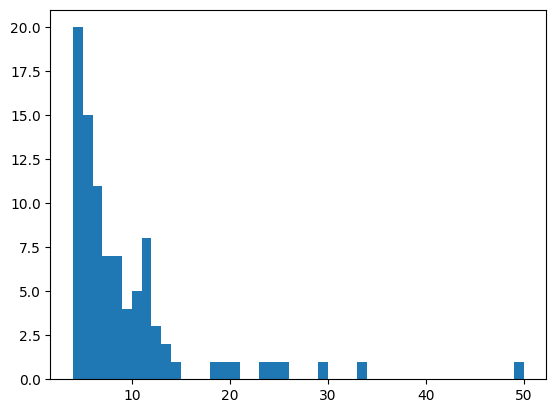

In [14]:
max_value = 50
plt.hist(mean_peak_amplitude_1,bins=range(int(min(mean_peak_amplitude_1)), max_value + 1))

print(np.median(mean_peak_amplitude_1))
print(np.std(mean_peak_amplitude_1))
print(ss.sem(mean_peak_amplitude_1))

In [15]:
BF_65_psilo_2 = []
mean_peak_amplitude_2 = []
for dict in psilo_dict:
    cell_list = list(psilo_dict[dict].keys())
    for cell in cell_list:
        BF = get_best_frequency_65db(psilo_dict[dict][cell]['tuning'],nfreq)
        BF_65_psilo_2.append(BF)

        if BF != 55:

            tuning_array = psilo_dict[dict][cell]['tuning']
            amplitude = tuning_array[BF,2]
            if amplitude > z_thresh:
                mean_peak_amplitude_2.append(amplitude)
            


print(BF_65_psilo_2)
print(len(mean_peak_amplitude_2))


[10, 0, 1, 7, 3, 11, 3, 1, 7, 11, 0, 11, 8, 1, 1, 3, 7, 1, 11, 9, 3, 2, 1, 9, 3, 0, 4, 10, 5, 7, 0, 7, 8, 5, 5, 1, 0, 1, 7, 9, 1, 11, 1, 5, 6, 4, 0, 3, 8, 11, 1, 1, 1, 1, 11, 1, 3, 0, 4, 8, 2, 10, 1, 9, 2, 7, 4, 1, 2, 3, 8, 1, 7, 4, 9, 3, 10, 3, 6, 4, 11, 1, 6, 7, 0, 2, 1, 3, 0, 0, 3, 6, 1, 5, 6, 8, 3, 3, 3, 1, 10, 0, 8, 0, 3, 3, 6, 11, 4, 0, 5, 10, 9, 9, 8, 0, 6, 1, 1, 3, 5, 5, 9, 0, 5, 0, 2, 11, 5, 10, 8, 1, 11, 5, 9, 1, 9, 3, 8, 11, 3, 1, 7, 4, 1, 9, 7, 11, 11, 6, 0, 9, 6, 3, 1, 4, 1, 8, 11, 1, 5, 11, 4, 1, 4, 3, 0, 1, 11, 3, 3, 0, 3, 11, 0, 10, 3, 8, 10, 1, 8, 7, 7, 6, 10, 3, 0, 8, 0, 4, 2, 1, 5, 0, 1, 3, 3, 1, 1, 1, 5, 11, 3, 8, 0, 3, 6, 1, 7, 1, 9, 6, 11, 0, 4, 0, 0, 2, 1, 0, 10, 5, 4, 0, 11, 1, 3, 0, 11, 11, 7, 1, 2, 3, 4, 8, 2, 9, 0, 7, 7, 8, 1, 3, 0, 1, 4, 7, 0, 1, 6, 4, 1, 5, 9, 1, 0, 0, 9, 11, 0, 9, 6, 6, 7, 10, 1, 3, 8, 10, 0, 0, 1, 3, 11, 2, 0, 3, 1, 1, 4, 10, 9, 0, 5, 10, 0, 2, 10, 7, 2, 5, 0, 3, 2, 8, 11, 1, 7, 9, 8, 0, 8, 8, 1, 7, 8, 5, 1, 1, 10, 2, 7, 1, 3, 0, 7, 4, 0,

7.4898438918131305
10.226506795744294
1.2052053838535173


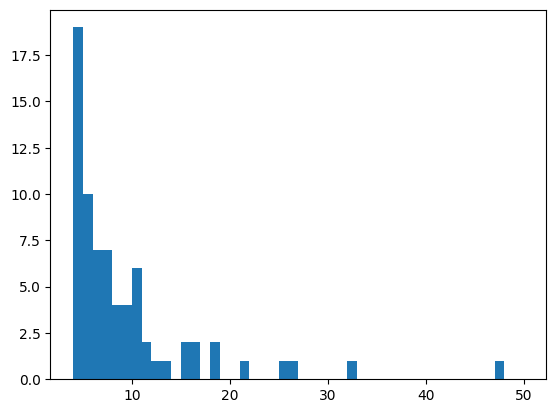

In [16]:
max_value = 50
plt.hist(mean_peak_amplitude_2,bins=range(int(min(mean_peak_amplitude_2)), max_value + 1))

print(np.median(mean_peak_amplitude_2))
print(np.std(mean_peak_amplitude_2))
print(ss.sem(mean_peak_amplitude_2))

In [17]:
ss.ttest_ind(mean_peak_amplitude_1,mean_peak_amplitude_2)
# P value = 0.015

Ttest_indResult(statistic=-0.6940362148698968, pvalue=0.4886474373609899)

In [18]:
# # Save the megadicts
# BASE_PATH = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/Megadicts/"

# # save the recording information 
# with open(BASE_PATH+"psilo_pre_dict.pkl",'wb') as f:
#         pickle.dump(saline_dict,f)

# with open(BASE_PATH+"psilo_post_dict.pkl",'wb') as f:
#         pickle.dump(psilo_dict,f)

In [19]:
df_percent_active = pd.DataFrame(columns=['Pre-Psilocybin','Post-Psilocybin'])

pre = pd.DataFrame(mean_peak_amplitude_1)
post = pd.DataFrame(mean_peak_amplitude_2)

df_percent_active['Pre-Psilocybin'] = pre
df_percent_active['Post-Psilocybin'] = post

C:\Users\Conor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


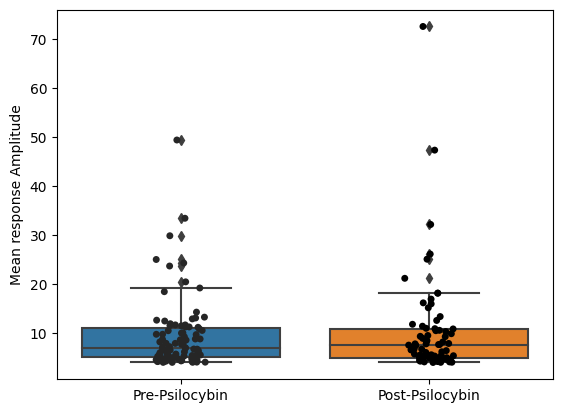

In [20]:
ax = sns.boxplot(data=df_percent_active),
sns.stripplot(data=df_percent_active,color='black')
plt.ylabel("Mean response Amplitude")

plt.show()

In [83]:
# Get the best ampltidue across all intensities, not just 65 dB.

mean_peak_amplitude_all_int_1 = []

for dict in saline_dict:
    cell_list = list(saline_dict[dict].keys())
    for cell in cell_list:
        tuning_array = saline_dict[dict][cell]['peak_tuning']
        amplitude = np.amax(tuning_array)
        if amplitude > z_thresh:
            mean_peak_amplitude_all_int_1.append(amplitude)

print(len(mean_peak_amplitude_all_int_1))

1879


7.28189115245341
16.847613240661527
0.3887680714371534


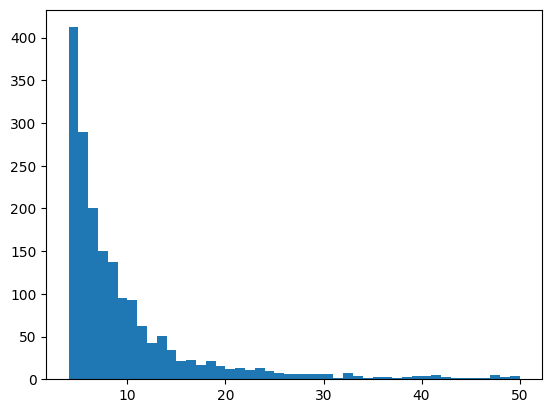

In [84]:
max_value = 50
plt.hist(mean_peak_amplitude_all_int_1,bins=range(int(min(mean_peak_amplitude_all_int_1)), max_value + 1))

print(np.median(mean_peak_amplitude_all_int_1))
print(np.std(mean_peak_amplitude_all_int_1))
print(ss.sem(mean_peak_amplitude_all_int_1))

In [85]:
# Get the best ampltidue across all intensities, not just 65 dB.

mean_peak_amplitude_all_int_2 = []

for dict in psilo_dict:
    cell_list = list(psilo_dict[dict].keys())
    for cell in cell_list:
        tuning_array = psilo_dict[dict][cell]['peak_tuning']
        amplitude = np.amax(tuning_array)
        if amplitude > z_thresh:
            mean_peak_amplitude_all_int_2.append(amplitude)

print(len(mean_peak_amplitude_all_int_2))


1778


6.791410088179976
18.265313221157147
0.43329473325640866


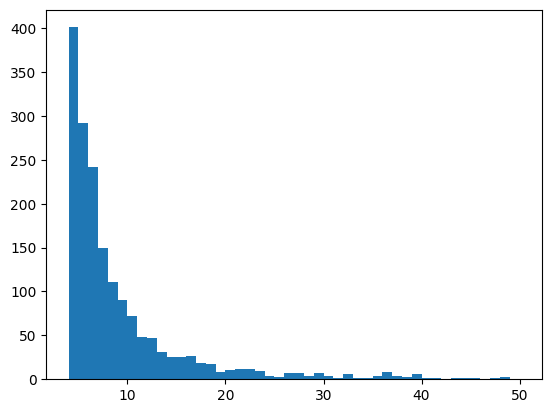

In [86]:
max_value = 50
plt.hist(mean_peak_amplitude_all_int_2,bins=range(int(min(mean_peak_amplitude_all_int_2)), max_value + 1))

print(np.median(mean_peak_amplitude_all_int_2))
print(np.std(mean_peak_amplitude_all_int_2))
print(ss.sem(mean_peak_amplitude_all_int_2))

In [87]:
df_amplitude_all_int = pd.DataFrame(columns=['Pre-Psilocybin','Post-Psilocybin'])

pre = pd.DataFrame(mean_peak_amplitude_all_int_1)
post = pd.DataFrame(mean_peak_amplitude_all_int_2)

df_amplitude_all_int['Pre-Psilocybin'] = pre
df_amplitude_all_int['Post-Psilocybin'] = post

C:\Users\Conor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


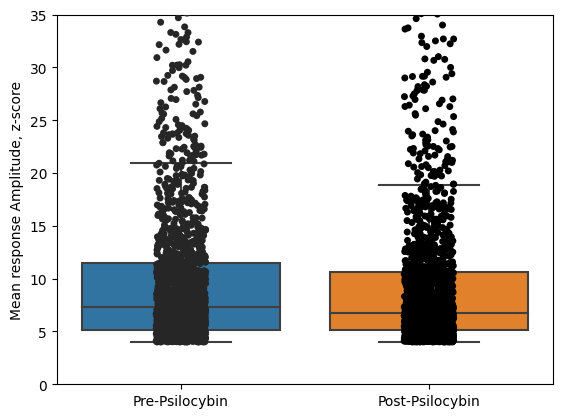

In [88]:
ax = sns.boxplot(data=df_amplitude_all_int,showfliers=False),
sns.stripplot(data=df_amplitude_all_int,color='black')
plt.ylabel("Mean response Amplitude, z-score")
plt.ylim(0, 35)

plt.show()

In [89]:
ss.ttest_ind(mean_peak_amplitude_all_int_1,mean_peak_amplitude_all_int_2)
# P value = 0.015

Ttest_indResult(statistic=1.319941247115812, pvalue=0.18693729549599014)

In [90]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(mean_peak_amplitude_all_int_1, mean_peak_amplitude_all_int_2)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 1740411.0
P-value: 0.028317673552189778


In [ ]:
filepath = 

np.save(filepath,)

In [29]:
for key in psilo_dict:
    try:
        print(psilo_dict[key][1]['matched_cells'])
    except Exception as e:
        print(f"Error occurred in dictionary iteration: {key}. Error message: {e}")

[[   1   21]
 [   2   28]
 [   3    2]
 [   4    9]
 [   5   48]
 [   6    6]
 [   7    8]
 [   8   14]
 [   9   12]
 [  10   61]
 [  11   54]
 [  12   45]
 [  14  179]
 [  15  166]
 [  16  316]
 [  17  279]
 [  18   53]
 [  20   20]
 [  21  280]
 [  22   41]
 [  23   13]
 [  25  205]
 [  26    7]
 [  27  116]
 [  28  170]
 [  29  199]
 [  30  111]
 [  31   44]
 [  32  121]
 [  33  197]
 [  34   16]
 [  35   62]
 [  36   11]
 [  37   88]
 [  38   42]
 [  39   63]
 [  40   85]
 [  42   77]
 [  43  139]
 [  44    4]
 [  45  110]
 [  47   18]
 [  48   60]
 [  49   80]
 [  50   32]
 [  51  180]
 [  52  129]
 [  53   17]
 [  54  150]
 [  55   39]
 [  56  413]
 [  57  352]
 [  58  249]
 [  59   66]
 [  60   79]
 [  61   97]
 [  62  104]
 [  63  542]
 [  65  393]
 [  66   81]
 [  67   24]
 [  68  138]
 [  69   50]
 [  70   86]
 [  71  146]
 [  72  115]
 [  73   59]
 [  74   43]
 [  75  187]
 [  76  159]
 [  78  362]
 [  79   96]
 [  80   70]
 [  81   83]
 [  82  518]
 [  84    5]
 [  85   38]

In [30]:
# Look at the change in peak amplitude only for the matched cells.

mean_peak_amplitude_matched_cells_1 = []

for dict in saline_dict:
    dictionary = saline_dict[dict]
    cell_list = list(saline_dict[dict].keys())
    matched_cells = np.array(dictionary[1]['matched_cells'])
    for cell in cell_list:
        if cell in matched_cells[:,1]:
            tuning_array = saline_dict[dict][cell]['tuning']
            amplitude = np.amax(tuning_array)
            if amplitude > z_thresh:
                mean_peak_amplitude_matched_cells_1.append(amplitude)

KeyError: 'matched_cells'

In [ ]:
print(np.mean(mean_peak_amplitude_matched_cells_1))
print(np.std(mean_peak_amplitude_matched_cells_1))
print(ss.sem(mean_peak_amplitude_matched_cells_1))

10.13195275462462
7.402247766637837
0.9400864064498817


In [80]:
# Look at the change in peak amplitude only for the matched cells.

mean_peak_amplitude_matched_cells_2 = []

for dict in psilo_dict:
    dictionary = psilo_dict[dict]
    cell_list = list(psilo_dict[dict].keys())
    matched_cells = np.array(dictionary[1]['matched_cells'])
    for cell in cell_list:
        if cell in matched_cells[:,1]:
            tuning_array = psilo_dict[dict][cell]['peak_tuning']
            amplitude = np.amax(tuning_array)
            if amplitude > z_thresh:
                mean_peak_amplitude_matched_cells_2.append(amplitude)






KeyboardInterrupt: 

In [ ]:
print(np.mean(mean_peak_amplitude_matched_cells_2))
print(np.std(mean_peak_amplitude_matched_cells_2))
print(ss.sem(mean_peak_amplitude_matched_cells_2))

8.283948826221783
4.4838369574536
0.5740964941601682


In [ ]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(mean_peak_amplitude_matched_cells_1, mean_peak_amplitude_matched_cells_2)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 2249.0
P-value: 0.1445268070733416


In [ ]:
ss.ttest_ind(mean_peak_amplitude_matched_cells_1, mean_peak_amplitude_matched_cells_2)

Ttest_indResult(statistic=1.671429929506837, pvalue=0.09717911120839508)

In [ ]:
print(len(mean_peak_amplitude_matched_cells_1))
print(len(mean_peak_amplitude_matched_cells_2))

63
62


In [ ]:
df_amplitude_matched_cells = pd.DataFrame(columns=['Pre-Psilocybin','Post-Psilocybin'])

pre = pd.DataFrame(mean_peak_amplitude_matched_cells_1)
post = pd.DataFrame(mean_peak_amplitude_matched_cells_2)

df_amplitude_matched_cells['Pre-Psilocybin'] = pre
df_amplitude_matched_cells['Post-Psilocybin'] = post

C:\Users\Conor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


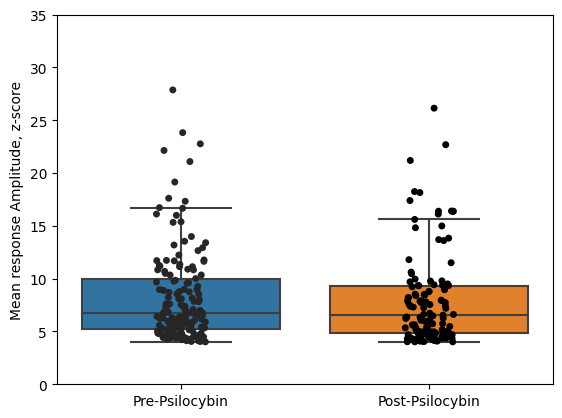

In [ ]:
ax = sns.boxplot(data=df_amplitude_all_int,showfliers=False),
sns.stripplot(data=df_amplitude_all_int,color='black')
plt.ylabel("Mean response Amplitude, z-score")
plt.ylim(0, 35)

plt.show()

In [60]:
amplitude_array_all = []


In [76]:
# Create an array that's matched_cells_all
matched_responsive_186_1 = []
matched_responsive_186_2 = []
matched_186_2 = []

PRE = 'saline_474'
POST = 'psilo_474'

matched_cells = psilo_dict[POST][1]['matched_cells']

for cell in saline_dict[PRE]:
    if cell in matched_cells[:,0] and saline_dict[PRE][cell]['active'] == True:
        matched_responsive_186_1.append(cell)

for cell in psilo_dict[POST]:
    if cell in matched_cells[:,1] and psilo_dict[POST][cell]['active'] == True:
        matched_responsive_186_2.append(cell)

# print(matched_responsive_186_1)
# print(matched_responsive_186_2)

indices = np.where(np.isin(matched_cells[:, 0], matched_responsive_186_1))

# Extract the corresponding values from the second column
corresponding_2 = matched_cells[indices, 1]

# Find the indices where the values in column 1 appear in 'sublist_col1'
indices_col1 = np.isin(matched_cells[:, 0], matched_responsive_186_1)

# Find the indices where the values in column 2 appear in 'sublist_col2'
indices_col2 = np.isin(matched_cells[:, 1], matched_responsive_186_2)

# Combine the two conditions using logical AND
combined_indices = np.logical_and(indices_col1, indices_col2)

# Extract the rows where both conditions are true
coactive = matched_cells[combined_indices]

# print(coactive)

amplitude_array = np.zeros_like(coactive,dtype=float)

for i, cell_1, cell_2 in zip(range(len(coactive)),coactive[:,0],coactive[:,1]):
    tuning_array_1 = saline_dict[PRE][cell_1]['peak_tuning']
    amplitude_1 = np.amax(tuning_array_1)
    amplitude_array[i,0] = amplitude_1
    
    tuning_array_2 = psilo_dict[POST][cell_2]['peak_tuning']
    amplitude_2 = np.amax(tuning_array_2)
    amplitude_array[i,1] = amplitude_2
  
mean_amp_1 = np.mean(amplitude_array[:,0])
mean_amp_2 = np.mean(amplitude_array[:,1])
print("mean 1 is",mean_amp_1)
print("mean 2 is",mean_amp_2) 



median_amp_1 = np.median(amplitude_array[:,0])
median_amp_2 = np.median(amplitude_array[:,1])
print("median 1 is",median_amp_1)
print("median 2 is",median_amp_2) 


amplitude_array_all.append(amplitude_array)


# amplitude_array_all = np.squeeze(amplitude_array_all)


mean 1 is 16.119822255524163
mean 2 is 19.021726241979525
median 1 is 13.150894689236818
median 2 is 11.374138054928721


In [77]:

amplitude_array_all_con = np.concatenate(amplitude_array_all,axis=0)
print(len(amplitude_array_all_con))



279


In [52]:
# print(len(np.squeeze(percent_change_ampltidue_all)))
filepath = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/"
# np.save(filepath + 'matched_cells_cohort_psilocybin_day',percent_change_ampltidue_all)
# percent_change_ampltidue_all = np.load(filepath + "matched_cells_cohort_psilocybin_day.npy")

# Replace infinite values with zero using list comprehension
# percent_change_ampltidue_all = [x if not (float('inf') in {x, -x}) else 0 for x in percent_change_ampltidue_all]

# np.save(filepath + 'matched_cells_cohort_psilocybin_day',amplitude_array_all_con)

In [79]:
print(np.median(amplitude_array_all_con[:,0]))
print(np.median(amplitude_array_all_con[:,1]))



10.098471971810214
9.508662814932837


In [53]:
relative_diff = (amplitude_array_all_con[:,1]-amplitude_array_all_con[:,0])/amplitude_array_all_con[:,0] * 100
print(np.mean(relative_diff))

np.save(filepath + 'relative_difference_psilo_day',relative_diff)

22.91925557191259


In [ ]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(amplitude_array_all_con[:,0], amplitude_array_all_con[:,1])

print("P Value:", p_value, "    Statistic:", statistic)

P Value: 0.04170385423242351     Statistic: 408.0


In [ ]:
# Stupid things you can do

# Normalize mean amplitude to the mean amplitude of all of the other frequency intensity conditions - to check that drop in saline isn't due to the drift.

# Look at trial by trial variability - get the frequency intensity matrix for all ten trials and run a pairwise pearson to see how different they are.  
# scipy pdist 'correlation' - 1-the output to convert back to correlation. square the correlation to convert to percent explainable variance.  plot before vs after and look at the diagonal.

# Also do variability of all ten matrices across pre- and post.  This tells you how stable is the tuning. Average and do a single comparison. 

# Check sync cable next to big cable on MaiTai. 


# Check the robustness of the number of trials to be declared active 
# Check the traditional activation method on the matched cells
 




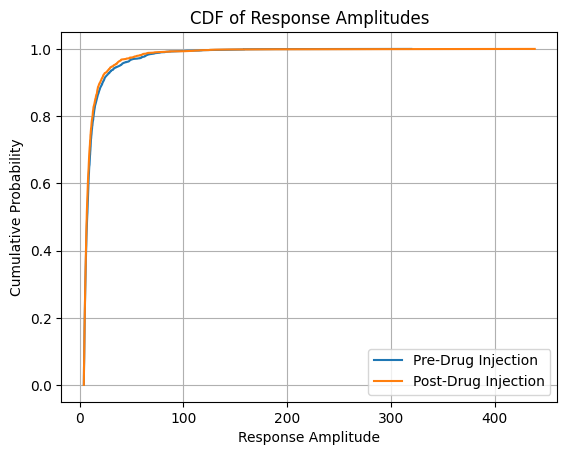

In [91]:
# Calculate CDFs
pre_amplitudes = mean_peak_amplitude_all_int_1
post_amplitudes = mean_peak_amplitude_all_int_2


pre_sorted = np.sort(pre_amplitudes)
pre_cdf = np.arange(1, len(pre_sorted) + 1) / len(pre_sorted)

post_sorted = np.sort(post_amplitudes)
post_cdf = np.arange(1, len(post_sorted) + 1) / len(post_sorted)

# Plot CDFs
plt.plot(pre_sorted, pre_cdf, label='Pre-Drug Injection')
plt.plot(post_sorted, post_cdf, label='Post-Drug Injection')

# Add labels and legend
plt.xlabel('Response Amplitude')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Response Amplitudes')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [94]:
mean_peak_amplitude_all_int_1_50 = [x for x in mean_peak_amplitude_all_int_1 if x <= 25]
mean_peak_amplitude_all_int_2_50 = [x for x in mean_peak_amplitude_all_int_2 if x <= 25]

In [125]:
amplitude_saline_2 = np.load(filepath + 'response_amplitudes_25_post_saline.npy')

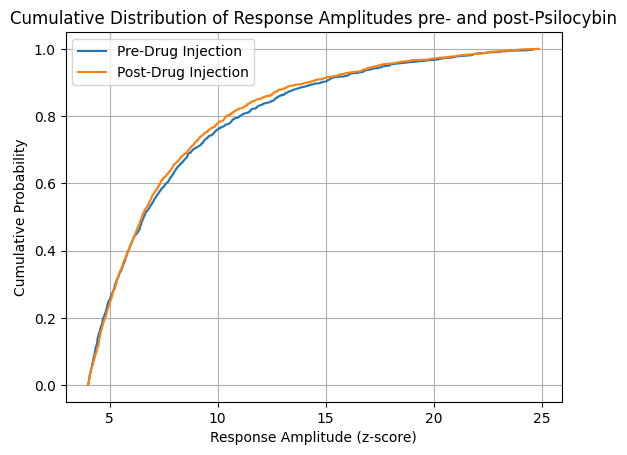

In [126]:
# Calculate CDFs
pre_amplitudes = amplitude_saline_2
post_amplitudes = mean_peak_amplitude_all_int_2_50


pre_sorted = np.sort(pre_amplitudes)
pre_cdf = np.arange(1, len(pre_sorted) + 1) / len(pre_sorted)

post_sorted = np.sort(post_amplitudes)
post_cdf = np.arange(1, len(post_sorted) + 1) / len(post_sorted)

# Plot CDFs
plt.plot(pre_sorted, pre_cdf, label='Pre-Drug Injection')
plt.plot(post_sorted, post_cdf, label='Post-Drug Injection')

# Add labels and legend
plt.xlabel('Response Amplitude (z-score)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Response Amplitudes pre- and post-Psilocybin')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [127]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(amplitude_saline_2, mean_peak_amplitude_all_int_2_50)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 1223406.0
P-value: 0.5954258185838346


In [124]:
sensitivity_saline_2 = np.load(filepath + 'sensitivity_post_saline.npy')


In [128]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(sensitivity_saline_2, sensitivity_psilo)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 1517121.5
P-value: 0.0015073465342411102


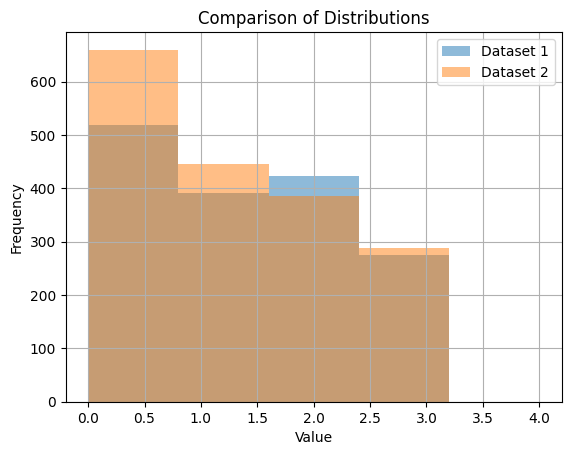

In [152]:
# Example data
data1 = sensitivity_saline_2  # First dataset of values between 0 and 4
data2 = sensitivity_psilo  # Second dataset of values between 0 and 4

# Create overlaid histograms
plt.hist(data1, bins=5, range=(0, 4), alpha=0.5, label='Dataset 1')
plt.hist(data2, bins=5, range=(0, 4), alpha=0.5, label='Dataset 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison of Distributions')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
sensitivity_psilo = []
for dict in psilo_dict:
    cell_list = list(psilo_dict[dict].keys())
    for cell in cell_list:
        tuning_array = np.array(psilo_dict[dict][cell]['peak_tuning'])
        for j in range(len(nInt)):
            if any(y > z_thresh for y in tuning_array[0:,j]):
                sensitivity_psilo.append(float(j))
                break
            else:
                continue

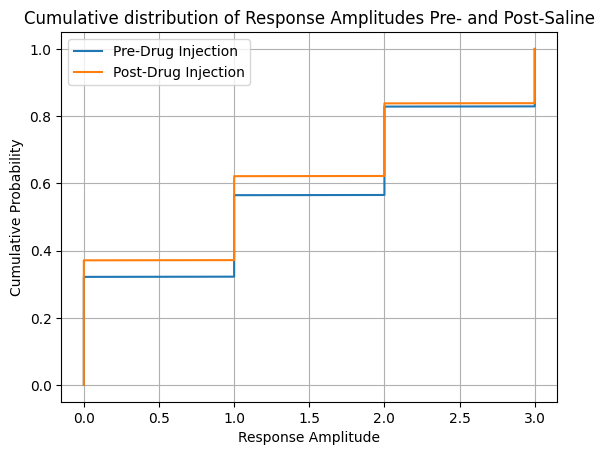

In [154]:
# Calculate CDFs
pre_amplitudes = sensitivity_saline_2
post_amplitudes = sensitivity_psilo


pre_sorted = np.sort(pre_amplitudes)
pre_cdf = np.arange(1, len(pre_sorted) + 1) / len(pre_sorted)

post_sorted = np.sort(post_amplitudes)
post_cdf = np.arange(1, len(post_sorted) + 1) / len(post_sorted)

# Plot CDFs
plt.plot(pre_sorted, pre_cdf, label='Pre-Drug Injection')
plt.plot(post_sorted, post_cdf, label='Post-Drug Injection')

# Add labels and legend
plt.xlabel('Response Amplitude')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative distribution of Response Amplitudes Pre- and Post-Saline')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [155]:
# Perform KS test between two samples
ks_statistic, p_value = kstest(sensitivity_saline_2, sensitivity_psilo)

# Print test results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

KS Statistic: 0.056537642241581205
P-value: 0.008577182382539596


Mann-Whitney U statistic: 1517121.5
P-value: 0.0015073465342411102
